In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 5.74MB/s]


In [ ]:
!unzip heart-disease-uci

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
X=pd.read_csv('heart.csv')


In [ ]:
y=X.pop('target')

In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
model=RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)

model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
model.oob_score_

0.41968555951230757

In [ ]:
y_oob=model.oob_prediction_
print( "C-stat:",roc_auc_score(y,y_oob))

C-stat: 0.8672375933245499


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.feature_importances_

array([0.06957329, 0.02805871, 0.2045409 , 0.06949619, 0.07402417,
       0.00574714, 0.01096769, 0.09661028, 0.03902254, 0.10683482,
       0.04687016, 0.13277703, 0.11547708])

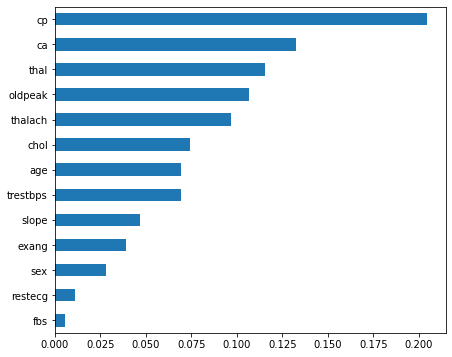

In [ ]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns).sort_values()

feature_importances.plot(kind='barh',figsize=(7,6))

In [ ]:
feature_importances

fbs         0.005747
restecg     0.010968
sex         0.028059
exang       0.039023
slope       0.046870
trestbps    0.069496
age         0.069573
chol        0.074024
thalach     0.096610
oldpeak     0.106835
thal        0.115477
ca          0.132777
cp          0.204541
dtype: float64

In [ ]:
model.feature_importances_

array([0.06957329, 0.02805871, 0.2045409 , 0.06949619, 0.07402417,
       0.00574714, 0.01096769, 0.09661028, 0.03902254, 0.10683482,
       0.04687016, 0.13277703, 0.11547708])

In [ ]:
%%timeit
model=RandomForestRegressor(1000,oob_score=True,n_jobs=-1,random_state=42)
model.fit(X,y)

1 loop, best of 3: 2.48 s per loop


In [ ]:
%%timeit
model=RandomForestRegressor(1000,oob_score=True,n_jobs=1,random_state=42)
model.fit(X,y)

1 loop, best of 3: 2.01 s per loop


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X,y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.3min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [ ]:
model=RandomForestRegressor(n_estimators=100,
                            oob_score=True,
                            n_jobs=-1,
                            random_state=42,
                            max_features=2,
                            max_depth=100,
                            bootstrap=True,
                            min_samples_leaf=4,
                            min_samples_split=12)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
roc=roc_auc_score(y_test,yhat)
print('c-stat',roc)

c-stat 0.97008547008547


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)

In [ ]:
yhat=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,yhat.round(), normalize=True)

0.9354838709677419